<a href="https://colab.research.google.com/github/palberth/Modelos_y_Metodos_de_Sistemas_Inteligentes/blob/main/Sistema_Control_Difuso_Iluminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de un Sistema de Control Difuso Simple Para Regular la Iluminación Artificial al Interior de una Habitación

**Objetivo:**
El objetivo de este notebook es implementar un sistema de control difuso básico para determinar la intensidad de la iluminación artificial en una habitación.

In [2]:
!pip install scikit-fuzzy matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 20.8 MB/s eta 0:00:00


# 1. Carga de Librerías

Para este ejercicio, se utilizarán las siguientes librerías:
- **`numpy`**: Para la creación de los universos de discurso (rangos numéricos).
- **`skfuzzy` y `skfuzzy.control`**: Para la definición del sistema de control difuso.
- **`matplotlib.pyplot`**: Para graficar las funciones de pertenencia y resultados de la simulación.

In [3]:
# Importar librerías necesarias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Configuración para mostrar gráficos inline en Jupyter Notebook (opcional en script)
%matplotlib inline

# 2. Definición del Problema: Control de Iluminación Interior

Se desea controlar la intensidad de la luz artificial en una habitación basándose en dos entradas:

- **Luz Natural**: Porcentaje de luz solar disponible (0 a 100).
- **Hora del Día**: Hora actual expresada en formato 24 horas (0 a 24).

La salida será la **intensidad de la luz artificial** (0 a 100%).

# 3. Desarrollo del Sistema de Control Difuso

## 3.1. Definición de Variables del Universo y Funciones de Pertenencia

In [16]:
# Entradas
luz_natural = ctrl.Antecedent(np.arange(0, 101, 1), 'luz_natural')
hora_dia = ctrl.Antecedent(np.arange(0, 25, 1), 'hora_dia')

# Salida
luz_artificial = ctrl.Consequent(np.arange(0, 101, 1), 'luz_artificial')

# Funciones de pertenencia para luz natural
luz_natural['baja'] = fuzz.trimf(luz_natural.universe, [0, 0, 50])
luz_natural['media'] = fuzz.trimf(luz_natural.universe, [25, 50, 75])
luz_natural['alta'] = fuzz.trimf(luz_natural.universe, [50, 100, 100])

# Funciones de pertenencia para hora del día
hora_dia['mañana'] = fuzz.trimf(hora_dia.universe, [0, 6, 12])
hora_dia['tarde'] = fuzz.trimf(hora_dia.universe, [10, 14, 18])
hora_dia['noche'] = fuzz.trimf(hora_dia.universe, [17, 21, 24])

# Funciones de pertenencia para la salida
luz_artificial['baja'] = fuzz.trimf(luz_artificial.universe, [0, 0, 50])
luz_artificial['media'] = fuzz.trimf(luz_artificial.universe, [25, 50, 75])
luz_artificial['alta'] = fuzz.trimf(luz_artificial.universe, [50, 100, 100])

## 3.2. Visualización de las Funciones de Pertenencia

Visualizando Funciones de Pertenencia:


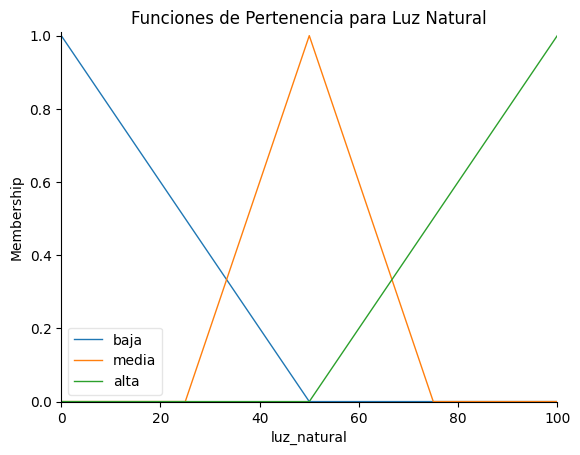

In [21]:
# Visualizar las variables de entrada y salida con sus funciones de pertenencia
print("Visualizando Funciones de Pertenencia:")
luz_natural.view()
plt.title("Funciones de Pertenencia para Luz Natural")
plt.show()


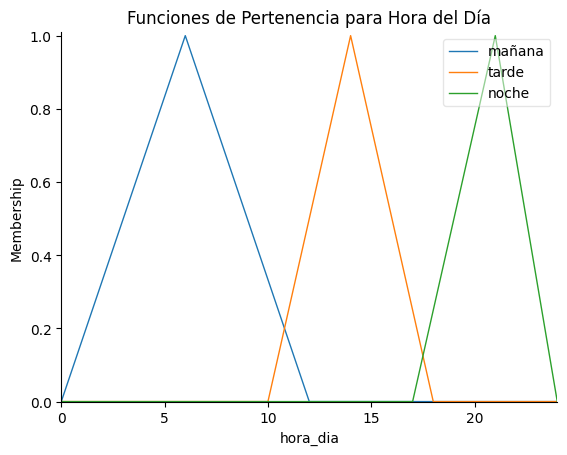

In [24]:
hora_dia.view()
plt.title("Funciones de Pertenencia para Hora del Día")
plt.show()

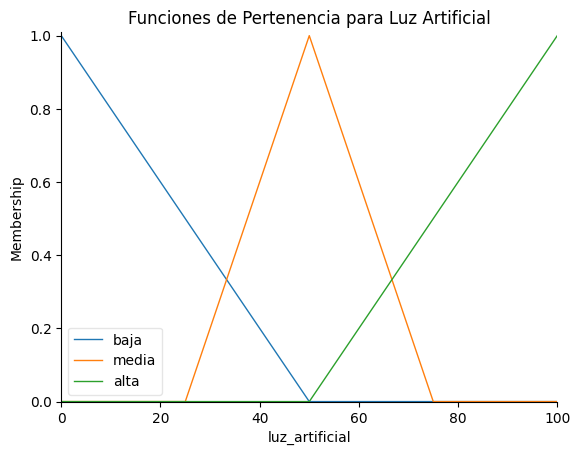

In [34]:
luz_artificial.view()
plt.title("Funciones de Pertenencia para Luz Artificial")
plt.show()

## 3.3. Definición de las Reglas Difusas

In [35]:
# Definir las reglas
print("\nDefiniendo las Reglas Difusas...")
regla1 = ctrl.Rule(luz_natural['alta'] & hora_dia['mañana'], luz_artificial['baja'])
regla2 = ctrl.Rule(luz_natural['media'] & hora_dia['tarde'], luz_artificial['media'])
regla3 = ctrl.Rule(luz_natural['baja'] | hora_dia['noche'], luz_artificial['alta'])
print("Reglas definidas.")


Definiendo las Reglas Difusas...
Reglas definidas.


## 3.4. Creación del Sistema de Control y Simulación

In [36]:
# Crear el sistema de control
print("\nCreando el Sistema de Control...")
# Asegurarse que la lista de reglas es correcta
sistema_control = ctrl.ControlSystem([regla1, regla2, regla3])
print("Sistema de Control creado.")


Creando el Sistema de Control...
Sistema de Control creado.


In [37]:
# Crear la simulación del sistema de control
print("\nCreando la Simulación del Sistema de Control...")
simulador = ctrl.ControlSystemSimulation(sistema_control)
print("Simulación creada.")


Creando la Simulación del Sistema de Control...
Simulación creada.


## 3.5. Simulación con Entradas Específicas y Visualización del Resultado
**Objetivo:** Proporcionar valores de entrada específicos al sistema (Luz natural = 30%, Hora del día = 20h) y observar la salida calculada para la luz artificial.

**Proceso:**
1. Asignar los valores de entrada a la simulación.
2. Ejecutar el método `compute()`.
3. Imprimir el valor de salida numérico.
4. Visualizar la variable de salida `luz_artificial` con el resultado de la simulación, mostrando la agregación de las reglas y el punto de desfusificación.

In [38]:
# Establecer valores de entrada para la simulación
print("\nEstableciendo entradas para la simulación:")
luz_natural_input = 30  # %Luz natural
hora_dia_input = 20   # Hora del día
simulador.input['luz_natural'] = luz_natural_input
simulador.input['hora_dia'] = hora_dia_input
print(f"Luz Natural: {luz_natural_input}%, Hora del Día: {hora_dia_input}h")

# Ejecutar la simulación
# Calcular la salida
print("\nCalculando la salida del sistema difuso...")



Estableciendo entradas para la simulación:
Luz Natural: 30%, Hora del Día: 20h

Calculando la salida del sistema difuso...



Calculando la salida del sistema difuso...

Intensidad recomendada de luz artificial: 82.50%


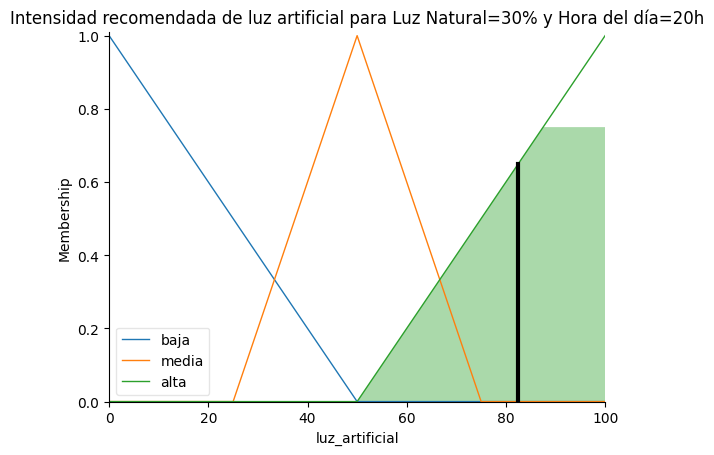

In [39]:
# Calcular la salida
print("\nCalculando la salida del sistema difuso...")
try:
  simulador.compute()
  print(f"\nIntensidad recomendada de luz artificial: {simulador.output['luz_artificial']:.2f}%")
  luz_artificial.view(sim=simulador)
  plt.title("Intensidad recomendada de luz artificial para Luz Natural=30% y Hora del día=20h")
  plt.show()
except Exception as e:
  print(f"Error durante la computación o visualización: {e}")
  print("Asegúrese de que las entradas activan al menos una regla.")

# 4. Conclusiones del Ejercicio

**Interpretación del Resultado:** Con una
La visualización de la variable de salida `luz natural` de 30% y una `hora del día` de 20 h (8 p.m.),
el sistema difuso recomienda una intensidad de `luz artificial` del 82.50% aproximadamente el valor calculado,
debido a la baja luz natural y el horario nocturno.

**Aprendizaje General:**
- Variables Lingüísticas
- Funciones de Pertenencia
- Reglas Difusas
- Mecanismo de Inferencia
- Desfuzzificación

La lógica difusa permite representar conocimiento experto y construir sistemas robustos para tomar decisiones en contextos con incertidumbre.